<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/DNF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final project assignment

The final project is about simulating rection times with a dynamic neural field (DNF) model. A basic simulation program is provided in DNF.ipynb. You should use and modify this program to study a gap-overlap condition of motor initiation. This is a simplified version of the model and conditions discussed in Trappenberg et al., Cognitive Neuroscience 2001,  https://hallab.cs.dal.ca/images/f/f5/JoCNTrappenbergetal.pdf. 

In the gap condition, a fixation stimulus is turned off before a target stimulus is applied. In an overlap condition, the target stimulus overlaps in time the target stimulus. 

Provide a plot that shows the variations of reaction times with these conditions.In addition to this basic simulation, provide a study where you vary another parameter of the model anddiscuss how the results will vary under such changed conditions.Please provide a short description of your re


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29
 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5
  4  3  2  1]
[ 1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30
 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6
  5  4  3  2]
[ 2  1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31
 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7
  6  5  4  3]
[ 3  2  1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23

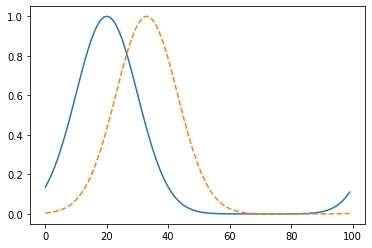

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Dynamic Neural Field Model (1D)
nn = 100;  #The number of neurons in the ring
dx=2*np.pi/nn;  # All nodes are evenly spaced out around the ring


sig = 2*np.pi/10; #standard deviation of weight matrix 
C=0.5; #Inhibition Constant

i=np.array(range(nn)) 
pat=np.zeros((nn,nn))
for loc in range(nn):
    dis= np.fmin(abs(i-loc),nn-abs(i-loc))
    print(dis)
    pat[:,loc]=np.exp(-(dis*dx)**2/(2*sig**2))
    

##Plot spacing distribution of nodes
plt.plot(pat[:,int(nn/5)])
plt.plot(pat[:,int(nn/3)],'--')


In [0]:
dis

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

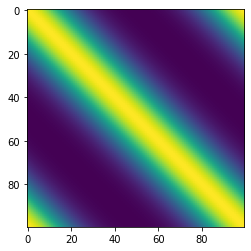

In [0]:
# Training weight matrix
w=pat@pat.T; 
w=w/w[0,0]; 
w=4*(w-C);
plt.imshow(w)    

In [0]:
w

array([[-6.        , -6.00998751, -6.03980066, ..., -6.08899505,
        -6.03980066, -6.00998751],
       [-6.00998751, -6.        , -6.00998751, ..., -6.15684224,
        -6.08899505, -6.03980066],
       [-6.03980066, -6.00998751, -6.        , ..., -6.24234775,
        -6.15684224, -6.08899505],
       ...,
       [-6.08899505, -6.15684224, -6.24234775, ..., -6.        ,
        -6.00998751, -6.03980066],
       [-6.03980066, -6.08899505, -6.15684224, ..., -6.00998751,
        -6.        , -6.00998751],
       [-6.00998751, -6.03980066, -6.08899505, ..., -6.03980066,
        -6.00998751, -6.        ]])

# The Differential Equation:

$\tau \frac{\partial u}{\partial t} = -u(x,t) +\int _{y} w(x,y)r(y,t)dy + I^{ext}(x,t)$

and 

$r(x,t) = g(u(x,t))$

Where g is a logistic activation function.

In [0]:
# continuous-time recurrent neural network 
def udot(u, t, w, I_ext, dx):
    tau_inv=0.2 #timescale constant
    r=1/(1+np.exp(-u)) #logistic activation function
    I_int=w@r*dx;
    dudt = tau_inv*(-u+I_int+I_ext)    
    return dudt

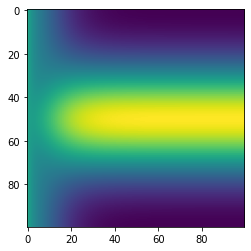

In [0]:
# integrate from initial condition 
from scipy.integrate import odeint #import ODEsolver
t = np.arange(100) #integration time range
u0 = np.zeros(100) #initial conditions
I_ext=pat[:,50] #apply an external current 
sol1=odeint(udot, u0, t, args=(w, I_ext, dx))
u0=sol1[-1,:]
plt.imshow(sol1.T)


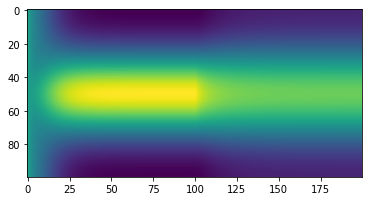

In [0]:
##Turn off current
I_ext=np.zeros(100)
sol2=odeint(udot, u0, t, args=(w, I_ext, dx))
sol2=np.append(sol1,sol2,axis=0)
plt.imshow(sol2.T)

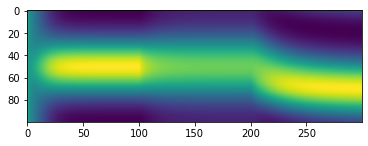

In [0]:
u0=sol2[-1,:]
I_ext=pat[:,70]
sol3=odeint(udot, u0, t, args=(w, I_ext, dx))
x3=sol3[:,30]
sol3=np.append(sol2,sol3,axis=0)
plt.imshow(sol3.T)


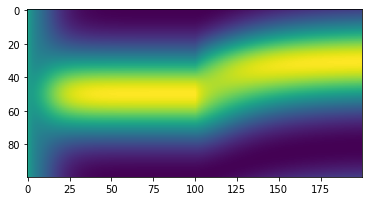

In [0]:
u0=sol1[-1,:]
I_ext=pat[:,30]
sol4=odeint(udot, u0, t, args=(w, I_ext, dx))
x4=sol4[:,30]
sol4=np.append(sol1,sol4,axis=0)
plt.imshow(sol4.T)

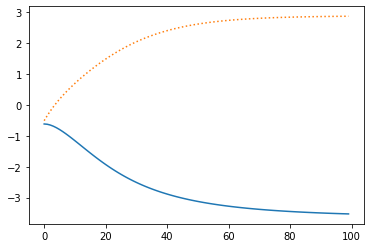

In [0]:
plt.plot(x3)
plt.plot(x4,':')


In [0]:
def currentSwitch(n_count,act_n,T = bool):
  if T==True:
    I_ext=pat[:,act_n]
    return I_ext
  else:
    I_ext=np.zeros(n_count)
    return I_ext

I_Ext = currentSwitch(n_count=100,act_n=50,T=True)
I_Ext

array([3.72665317e-06, 6.11356797e-06, 9.92950431e-06, 1.59667839e-05,
       2.54193465e-05, 4.00652974e-05, 6.25215038e-05, 9.65934137e-05,
       1.47748360e-04, 2.23745794e-04, 3.35462628e-04, 4.97955422e-04,
       7.31802419e-04, 1.06476624e-03, 1.53381068e-03, 2.18749112e-03,
       3.08871541e-03, 4.31784001e-03, 5.97602290e-03, 8.18870101e-03,
       1.11089965e-02, 1.49207861e-02, 1.98410947e-02, 2.61214099e-02,
       3.40474547e-02, 4.39369336e-02, 5.61347628e-02, 7.10053537e-02,
       8.89216175e-02, 1.10250525e-01, 1.35335283e-01, 1.64474457e-01,
       1.97898699e-01, 2.35746077e-01, 2.78037300e-01, 3.24652467e-01,
       3.75311099e-01, 4.29557358e-01, 4.86752256e-01, 5.46074427e-01,
       6.06530660e-01, 6.66976811e-01, 7.26149037e-01, 7.82704538e-01,
       8.35270211e-01, 8.82496903e-01, 9.23116346e-01, 9.55997482e-01,
       9.80198673e-01, 9.95012479e-01, 1.00000000e+00, 9.95012479e-01,
       9.80198673e-01, 9.55997482e-01, 9.23116346e-01, 8.82496903e-01,
      

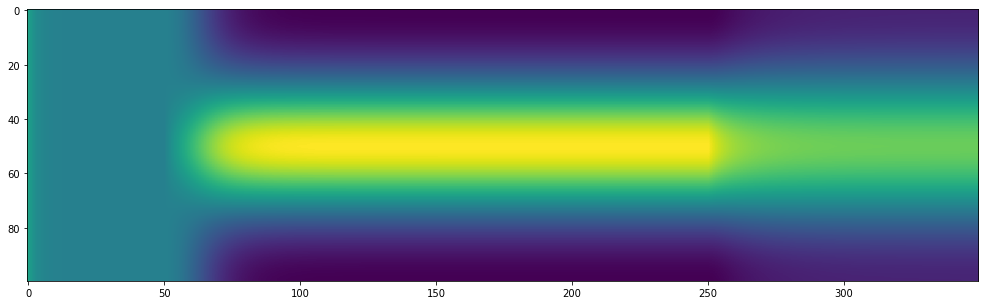

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #import ODEsolver

# Dynamic Neural Field Model (1D)
nn = 100;  #The number of neurons in the ring
dx=2*np.pi/nn;  # All nodes are evenly spaced out around the ring
sig = 2*np.pi/10; #standard deviation of weight matrix 
C=0.5; #Inhibition Constant

i=np.array(range(nn)) 
pat=np.zeros((nn,nn))
for loc in range(nn):
    dis= np.fmin(abs(i-loc),nn-abs(i-loc))
    pat[:,loc]=np.exp(-(dis*dx)**2/(2*sig**2))

# integrate from initial conditions
# Training weight matrix
w=pat@pat.T; 
w=w/w[0,0]; 
w=4*(w-C);
  

# continuous-time recurrent neural network 
def udot(u, t, w, I_ext, dx):
    tau_inv=0.2 #timescale constant
    r=1/(1+np.exp(-u)) #logistic activation function
    I_int=w@r*dx;
    dudt = tau_inv*(-u+I_int+I_ext)    
    return dudt
#Controls our Current
def currentSwitch(n_count,act_n,T = bool):
  if T==True:
    I_ext=pat[:,act_n]
    return I_ext
  else:
    I_ext=np.zeros(n_count)
    return I_ext

#Initial Conditions
#t = np.arange(200) #integration time range
u0 = np.zeros(100) #initial conditions
#Start without external current 
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
#First Integration
sol1=odeint(udot, u0, t=np.arange(50), args=(w, I_ext, dx))
u0=sol1[-1,:] #save the first integration

#Second Integration
I_ext = currentSwitch(n_count=nn,act_n=50,T=True)
sol2=odeint(udot, u0, t=np.arange(100), args=(w, I_ext, dx)) #I_ext=np.zeros(100) #turn off the Input Current
#append the first integration to this one
sol2=np.append(sol1,sol2,axis=0)
u0=sol2[-1,:]

#Third Integration
I_ext = currentSwitch(n_count=nn,act_n=50,T=True)
sol3=odeint(udot, u0, t=np.arange(100), args=(w, I_ext, dx))
x3=sol3[:,:]
sol3=np.append(sol2,sol3,axis=0)
u0=sol3[-1,:]

#Fourth Integration
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
sol4=odeint(udot, u0, t=np.arange(100), args=(w, I_ext, dx))
x4=sol4[:,:]
sol4=np.append(sol3,sol4,axis=0)
u0=sol4[-1,:]

plt.figure(figsize=(20, 5))
plt.imshow(sol4.T)


In [0]:
sol3.shape

(250, 100)

In [0]:
sol4.shape

(350, 100)

In [0]:
sol4[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

IndexError: ignored

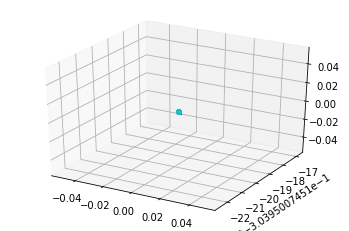

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(350):

  ax.scatter(sol4[0][i],sol4[1], zs=sol4[0], zdir='z', s=20, c=None, depthshade=True)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #import ODEsolver

# Dynamic Neural Field Model (1D)
nn = 100;  #The number of neurons in the ring
dx=2*np.pi/nn;  # All nodes are evenly spaced out around the ring
sig = 2*np.pi/10; #standard deviation of weight matrix 
C=0.5; #Inhibition Constant

i=np.array(range(nn)) 
pat=np.zeros((nn,nn))
for loc in range(nn):
    dis= np.fmin(abs(i-loc),nn-abs(i-loc))
    pat[:,loc]=np.exp(-(dis*dx)**2/(2*sig**2))

# integrate from initial conditions
# Training weight matrix
w=pat@pat.T; 
w=w/w[0,0]; 
w=4*(w-C);
  

# continuous-time recurrent neural network 
def udot(u, t, w, I_ext, dx):
    tau_inv=0.2 #timescale constant
    r=1/(1+np.exp(-u)) #logistic activation function
    I_int=w@r*dx;
    dudt = tau_inv*(-u+I_int+I_ext)    
    return dudt
#Controls our Current
def currentSwitch(n_count,act_n,T = bool):
  if T==True:
    I_ext=pat[:,act_n]
    return I_ext
  else:
    I_ext=np.zeros(n_count)
    return I_ext

#Initial Conditions
#t = np.arange(200) #integration time range
u0 = np.zeros(100) #initial conditions
#Start without external current 
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
#First Integration
sol1=odeint(udot, u0, t=np.arange(50), args=(w, I_ext, dx))
u0=sol1[-1,:] #save the first integration

#Second Integration
I_ext = currentSwitch(n_count=nn,act_n=0,T=True)
sol2=odeint(udot, u0, t=np.arange(150), args=(w, I_ext, dx)) #I_ext=np.zeros(100) #turn off the Input Current
#append the first integration to this one
sol2=np.append(sol1,sol2,axis=0)
u0=sol2[-1,:]

#Third Integration
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
sol3=odeint(udot, u0, t=np.arange(100), args=(w, I_ext, dx))
x3=sol3[:,:]
sol3=np.append(sol2,sol3,axis=0)
u0=sol3[-1,:]

#Fourth Integration

I_ext1 = 2.1*currentSwitch(n_count=nn,act_n=50,T=True)
#I_ext2 = 0*currentSwitch(n_count=nn,act_n=0,T=True)
I_ext2 = 1*currentSwitch(n_count=nn,act_n=0,T=True)

I_ext = I_ext1 + I_ext2
sol4=odeint(udot, u0, t=np.arange(78), args=(w, I_ext, dx)) #dynamic reversal at t=78
x4=sol4[:,:]
sol4=np.append(sol3,sol4,axis=0)
u0=sol4[-1,:]

#Fifth Integration
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
sol5=odeint(udot, u0, t=np.arange(500), args=(w, I_ext, dx))
x5=sol5[:,:]
sol5=np.append(sol4,sol5,axis=0)
u0=sol5[-1,:]

plt.figure(figsize=(20, 5))
plt.imshow(sol5.T)


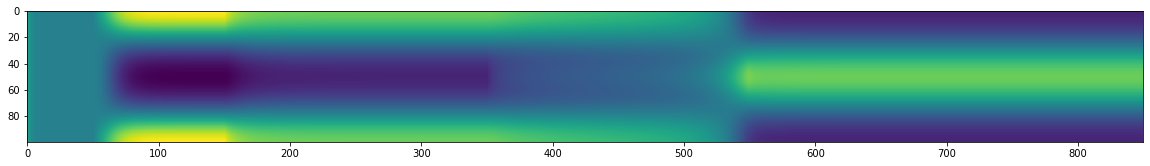

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #import ODEsolver

# Dynamic Neural Field Model (1D)
nn = 100;  #The number of neurons in the ring
dx=2*np.pi/nn;  # All nodes are evenly spaced out around the ring
sig = 2*np.pi/10; #standard deviation of weight matrix 
C=0.5; #Inhibition Constant

i=np.array(range(nn)) 
pat=np.zeros((nn,nn))
for loc in range(nn):
    dis= np.fmin(abs(i-loc),nn-abs(i-loc))
    pat[:,loc]=np.exp(-(dis*dx)**2/(2*sig**2))

# integrate from initial conditions
# Training weight matrix
w=pat@pat.T; 
w=w/w[0,0]; 
w=4*(w-C);
  

# continuous-time recurrent neural network 
def udot(u, t, w, I_ext, dx):
    tau_inv=0.2 #timescale constant
    r=1/(1+np.exp(-u)) #logistic activation function
    I_int=w@r*dx;
    dudt = tau_inv*(-u+I_int+I_ext)    
    return dudt
#Controls our Current
def currentSwitch(n_count,act_n,T = bool):
  if T==True:
    I_ext=pat[:,act_n]
    return I_ext
  else:
    I_ext=np.zeros(n_count)
    return I_ext

#Initial Conditions
#t = np.arange(200) #integration time range
u0 = np.zeros(100) #initial conditions
#Start without external current 
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
#First Integration
sol1=odeint(udot, u0, t=np.arange(50), args=(w, I_ext, dx))
u0=sol1[-1,:] #save the first integration

#Second Integration
I_ext = currentSwitch(n_count=nn,act_n=0,T=True)
sol2=odeint(udot, u0, t=np.arange(100), args=(w, I_ext, dx)) #I_ext=np.zeros(100) #turn off the Input Current
#append the first integration to this one
sol2=np.append(sol1,sol2,axis=0)
u0=sol2[-1,:]

#Third Integration
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
sol3=odeint(udot, u0, t=np.arange(200), args=(w, I_ext, dx))
x3=sol3[:,:]
sol3=np.append(sol2,sol3,axis=0)
u0=sol3[-1,:]

#Fourth Integration
I_ext1 = 0.7*currentSwitch(n_count=nn,act_n=50,T=True)
I_ext2 = 0*currentSwitch(n_count=nn,act_n=0,T=True)
I_ext = I_ext1 + I_ext2
sol4=odeint(udot, u0, t=np.arange(200), args=(w, I_ext, dx)) #dynamic reversal at t=64
x4=sol4[:,:]
sol4=np.append(sol3,sol4,axis=0)
u0=sol4[-1,:]

#Fifth Integration
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
sol5=odeint(udot, u0, t=np.arange(300), args=(w, I_ext, dx))
x5=sol5[:,:]
sol5=np.append(sol4,sol5,axis=0)
u0=sol5[-1,:]

plt.figure(figsize=(20, 5))
plt.imshow(sol5.T)


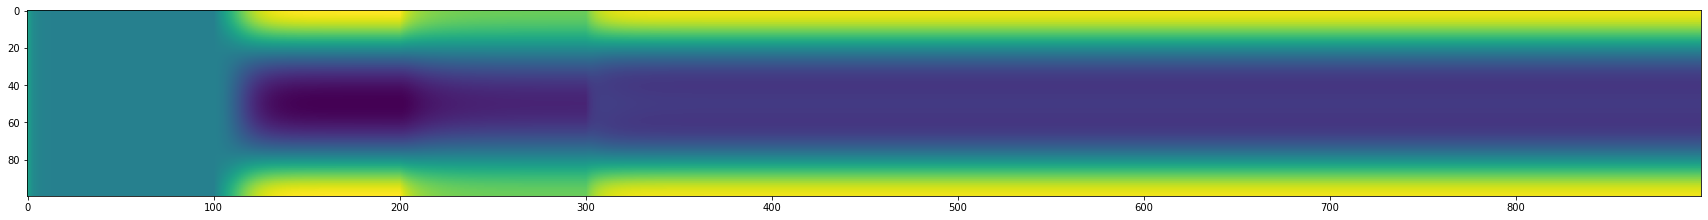

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #import ODEsolver
# Dynamic Neural Field Model (1D)

##General System Parameters
nn = 100;  #The number of neurons in the ring
dx=2*np.pi/nn;  # All nodes are evenly spaced out around the ring
sig = 2*np.pi/10; #standard deviation of weight matrix 
C=0.5; #Inhibition Constant

i=np.array(range(nn)) 
pat=np.zeros((nn,nn))
for loc in range(nn):
    dis= np.fmin(abs(i-loc),nn-abs(i-loc))
    pat[:,loc]=np.exp(-(dis*dx)**2/(2*sig**2))
# integrate from initial conditions
# Training weight matrix
#Hebbian Learning of w
w=pat@pat.T; 
w=w/w[0,0]; 
w=4*(w-C);
  
# continuous-time recurrent neural network 
def udot(u, t, w, I_ext, dx):
    tau_inv=0.2 #timescale constant
    r=1/(1+np.exp(-u)) #logistic activation function
    I_int=w@r*dx;
    dudt = tau_inv*(-u+I_int+I_ext)    
    return dudt


#Controls our Current
def currentSwitch(n_count,act_n,T = bool):
  if T==True:
    I_ext=pat[:,act_n]
    return I_ext
  else:
    I_ext=np.zeros(n_count)
    return I_ext

#Initial Conditions
#t = np.arange(200) #integration time range
u0 = np.zeros(100) #initial conditions 
#Start without external current 
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
#First Integration
sol1=odeint(udot, u0, t=np.arange(100), args=(w, I_ext, dx))
u0=sol1[-1,:] #save the first integration


#Second Integration
##Create a stimulus with an input current
I_ext = currentSwitch(n_count=nn,act_n=0,T=True)
sol2=odeint(udot, u0, t=np.arange(100), args=(w, I_ext, dx)) #I_ext=np.zeros(100) #turn off the Input Current
#append the first integration to this one
sol2=np.append(sol1,sol2,axis=0)
u0=sol2[-1,:]

#Third Integration
##Creating the Gap of Stimuli
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
sol3=odeint(udot,u0,t=np.arange(100), args=(w, I_ext, dx))
sol3=np.append(sol2,sol3,axis=0)

u0=sol3[-1,:]

##Fourth Integration 
##Overlap Conditon yaaayyyyyyyyyy
I_ext1 = 1*currentSwitch(n_count=nn,act_n=0,T=True)
I_ext2 = 1*currentSwitch(n_count=nn,act_n=50,T=True)
I_ext = I_ext1 + I_ext2
sol4=odeint(udot,u0,t=np.arange(100), args=(w, I_ext, dx))
sol4=np.append(sol3,sol4,axis=0)
u0=sol4[-1,:]

I_ext1=1*currentSwitch(n_count=nn,act_n=80,T=False)
sol5=odeint(udot,u0,t=np.arange(500), args=(w, I_ext, dx))
sol5=np.append(sol4,sol5,axis=0)
u0=sol5[-1,:]

plt.figure(figsize=(30, 30))
plt.imshow(sol5.T)


Lets try this again:


## Gap Condition:

"In the gap condition, a fixation stimulus is turned off before a target stimulus is applied. In an overlap condition, the target stimulus overlaps in time the target stimulus. "

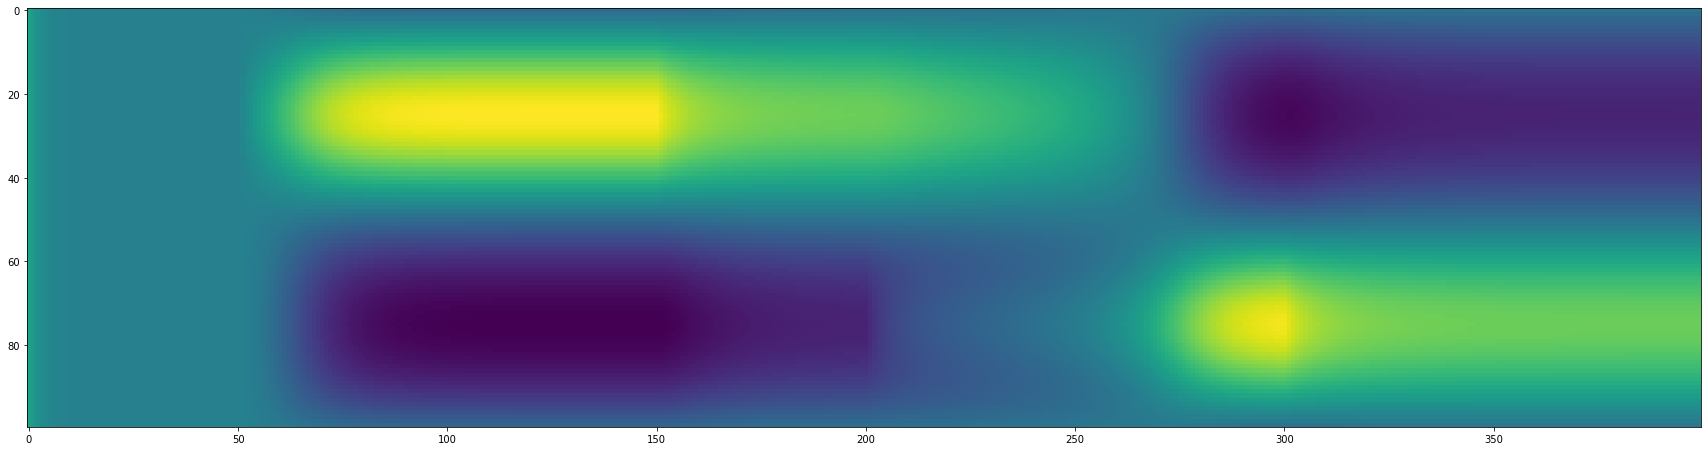

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #import ODEsolver
# Dynamic Neural Field Model (1D)

##General System Parameters
nn = 100;  #The number of neurons in the ring
dx=2*np.pi/nn;  # All nodes are evenly spaced out around the ring
sig = 2*np.pi/10; #standard deviation of weight matrix 
C=0.5; #Inhibition Constant

i=np.array(range(nn)) 
pat=np.zeros((nn,nn))
for loc in range(nn):
    dis= np.fmin(abs(i-loc),nn-abs(i-loc))
    pat[:,loc]=np.exp(-(dis*dx)**2/(2*sig**2))
# integrate from initial conditions
# Training weight matrix
#Hebbian Learning of w
w=pat@pat.T; 
w=w/w[0,0]; 
w=4*(w-C);
  
# continuous-time recurrent neural network 
def udot(u, t, w, I_ext, dx):
    tau_inv=0.2 #timescale constant
    r=1/(1+np.exp(-u)) #logistic activation function
    I_int=w@r*dx;
    dudt = tau_inv*(-u+I_int+I_ext)    
    return dudt


#Controls our Current
def currentSwitch(n_count,act_n,T = bool):
  if T==True:
    I_ext=pat[:,act_n]
    return I_ext
  else:
    I_ext=np.zeros(n_count)
    return I_ext

#Initial Conditions
#t = np.arange(200) #integration time range
u0 = np.zeros(100) #initial conditions 

#Start without external current 
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
#First Integration
sol1=odeint(udot, u0, t=np.arange(50), args=(w, I_ext, dx))
u0=sol1[-1,:] #save the first integration


#Second Integration
##Create a stimulus with an input current
I_ext = currentSwitch(n_count=nn,act_n=25,T=True)
sol2=odeint(udot, u0, t=np.arange(100), args=(w, I_ext, dx)) #I_ext=np.zeros(100) #turn off the Input Current
#append the first integration to this one
sol2=np.append(sol1,sol2,axis=0)
u0=sol2[-1,:]

#Third Integration
##Creating the Gap of Stimuli from T=150 TO T=200
I_ext = currentSwitch(n_count=nn,act_n=50,T=False)
sol3=odeint(udot,u0,t=np.arange(50), args=(w, I_ext, dx))
sol3=np.append(sol2,sol3,axis=0)
u0=sol3[-1,:]

##Fourth Integration 
##Create target stimulus at Node=75 FROM T=200 to T=300
I_ext1 = 1*currentSwitch(n_count=nn,act_n=0,T=False)
I_ext2 = 1*currentSwitch(n_count=nn,act_n=75,T=True)
I_ext = I_ext1 + I_ext2
sol4=odeint(udot,u0,t=np.arange(100), args=(w, I_ext, dx)) #dynamic change of memory around t=64
sol4=np.append(sol3,sol4,axis=0)
u0=sol4[-1,:]

##Fifth Integration
## Take away all stimulus
I_ext=1*currentSwitch(n_count=nn,act_n=25,T=False)
sol5=odeint(udot,u0,t=np.arange(100), args=(w, I_ext, dx))
sol5=np.append(sol4,sol5,axis=0)
u0=sol5[-1,:]

##Plot Figure
plt.figure(figsize=(30, 30))
plt.imshow(sol5.T)


## Overlap:

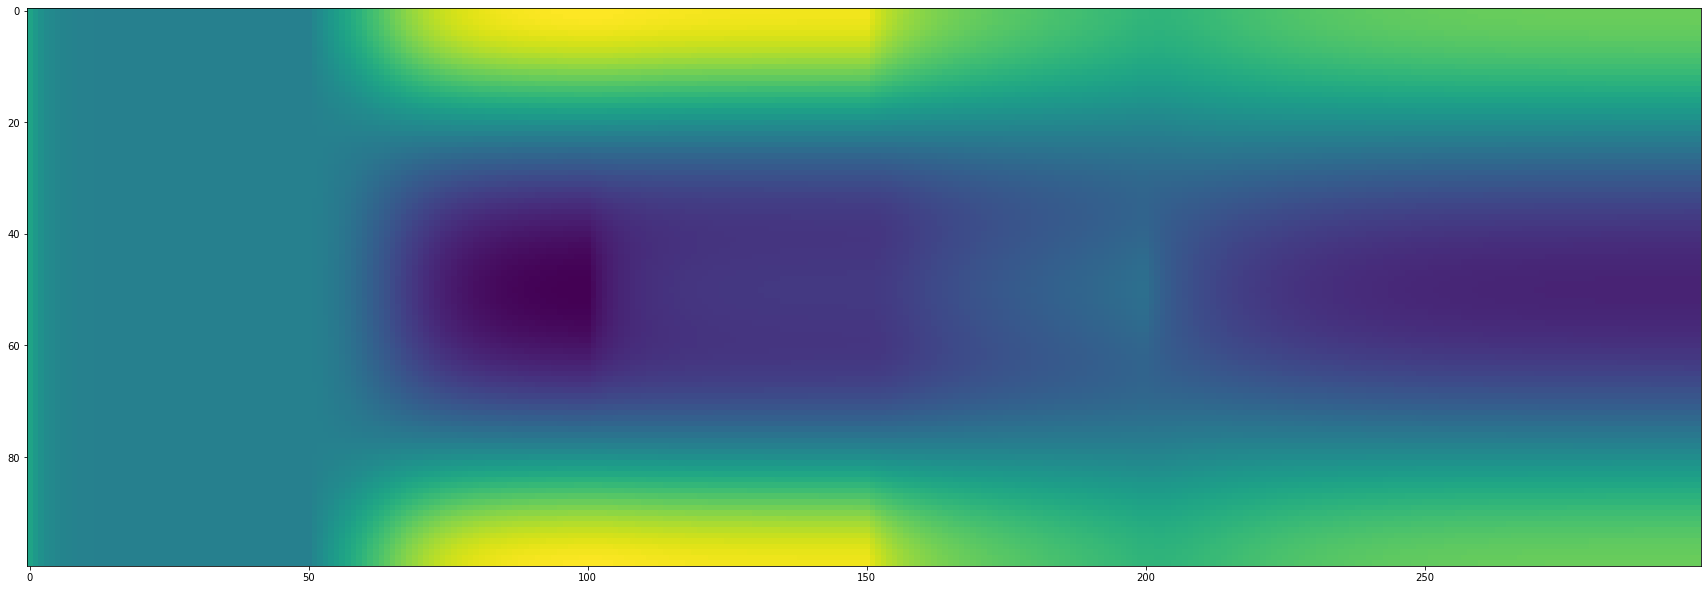

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #import ODEsolver
# Dynamic Neural Field Model (1D)

##General System Parameters
nn = 100;  #The number of neurons in the ring
dx=2*np.pi/nn;  # All nodes are evenly spaced out around the ring
sig = 2*np.pi/10; #standard deviation of weight matrix 
C=0.5; #Inhibition Constant

i=np.array(range(nn)) 
pat=np.zeros((nn,nn))
for loc in range(nn):
    dis= np.fmin(abs(i-loc),nn-abs(i-loc))
    pat[:,loc]=np.exp(-(dis*dx)**2/(2*sig**2))
# integrate from initial conditions
# Training weight matrix
#Hebbian Learning of w
w=pat@pat.T; 
w=w/w[0,0]; 
w=4*(w-C);
  
# continuous-time recurrent neural network 
def udot(u, t, w, I_ext, dx):
    tau_inv=0.2 #timescale constant
    r=1/(1+np.exp(-u)) #logistic activation function
    I_int=w@r*dx;
    dudt = tau_inv*(-u+I_int+I_ext)    
    return dudt


#Controls our Current
def currentSwitch(n_count,act_n,T = bool):
  if T==True:
    I_ext=pat[:,act_n]
    return I_ext
  else:
    I_ext=np.zeros(n_count)
    return I_ext

#Initial Conditions
#t = np.arange(200) #integration time range
u0 = np.zeros(100) #initial conditions 

#Start without external current 
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=False)
I_ext2 = currentSwitch(n_count=nn,act_n=50,T=False)
I_ext=I_ext1 + I_ext2
#First Integration
sol1=odeint(udot, u0, t=np.arange(50), args=(w, I_ext, dx))
u0=sol1[-1,:] #save the first integration


#Second Integration
##Create a stimulus with an input current
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=True)
I_ext2 = currentSwitch(n_count=nn,act_n=50,T=False)
I_ext=I_ext1 + I_ext2
sol2=odeint(udot, u0, t=np.arange(50), args=(w, I_ext, dx)) #I_ext=np.zeros(100) #turn off the Input Current
#append the first integration to this one
sol2=np.append(sol1,sol2,axis=0)
u0=sol2[-1,:]

#Third Integration OVERLAP CONDITION
##Creating the Gap of Stimuli from T=150 TO T=200
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=True)
I_ext2 = currentSwitch(n_count=nn,act_n=50,T=True)
I_ext=I_ext1 + I_ext2
sol3=odeint(udot,u0,t=np.arange(50), args=(w, I_ext, dx))
sol3=np.append(sol2,sol3,axis=0)
u0=sol3[-1,:]

##Fourth Integration 
##Create target stimulus at Node=75 FROM T=200 to T=300
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=False)
I_ext2 = currentSwitch(n_count=nn,act_n=50,T=True)
I_ext=I_ext1 + I_ext2
sol4=odeint(udot,u0,t=np.arange(50), args=(w, I_ext, dx)) #dynamic change of memory around t=64
sol4=np.append(sol3,sol4,axis=0)
u0=sol4[-1,:]

##Fifth Integration
## Take away all stimulus
I_ext=1*currentSwitch(n_count=nn,act_n=0,T=False)
sol5=odeint(udot,u0,t=np.arange(100), args=(w, I_ext, dx))
sol5=np.append(sol4,sol5,axis=0)
u0=sol5[-1,:]

##Plot Figure
plt.figure(figsize=(30, 30))
plt.imshow(sol5.T)


# Overlap but with Memory Takeover

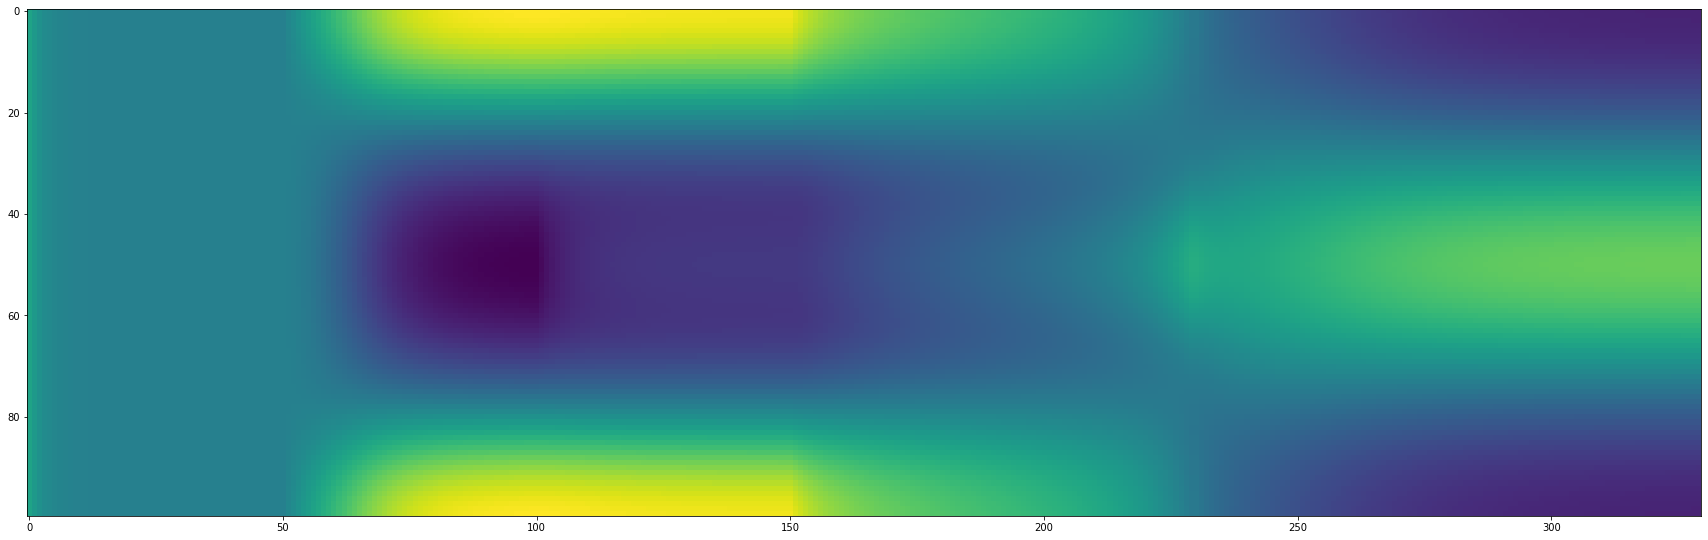

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #import ODEsolver
# Dynamic Neural Field Model (1D)

##General System Parameters
nn = 100;  #The number of neurons in the ring
dx=2*np.pi/nn;  # All nodes are evenly spaced out around the ring
sig = 2*np.pi/10; #standard deviation of weight matrix 
C=0.5; #Inhibition Constant

i=np.array(range(nn)) 
pat=np.zeros((nn,nn))
for loc in range(nn):
    dis= np.fmin(abs(i-loc),nn-abs(i-loc))
    pat[:,loc]=np.exp(-(dis*dx)**2/(2*sig**2))
# integrate from initial conditions
# Training weight matrix
#Hebbian Learning of w
w=pat@pat.T; 
w=w/w[0,0]; 
w=4*(w-C);
  
# continuous-time recurrent neural network 
def udot(u, t, w, I_ext, dx):
    tau_inv=0.2 #timescale constant
    r=1/(1+np.exp(-u)) #logistic activation function
    I_int=w@r*dx;
    dudt = tau_inv*(-u+I_int+I_ext)    
    return dudt


#Controls our Current
def currentSwitch(n_count,act_n,T = bool):
  if T==True:
    I_ext=pat[:,act_n]
    return I_ext
  else:
    I_ext=np.zeros(n_count)
    return I_ext

#Initial Conditions
#t = np.arange(200) #integration time range
u0 = np.zeros(100) #initial conditions 

#Start without external current 
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=False)
I_ext2 = currentSwitch(n_count=nn,act_n=50,T=False)
I_ext=I_ext1 + I_ext2
#First Integration
sol1=odeint(udot, u0, t=np.arange(50), args=(w, I_ext, dx))
u0=sol1[-1,:] #save the first integration


#Second Integration
##Create a stimulus with an input current
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=True)
I_ext2 = currentSwitch(n_count=nn,act_n=50,T=False)
I_ext=I_ext1 + I_ext2
sol2=odeint(udot, u0, t=np.arange(50), args=(w, I_ext, dx)) #I_ext=np.zeros(100) #turn off the Input Current
#append the first integration to this one
sol2=np.append(sol1,sol2,axis=0)
u0=sol2[-1,:]

#Third Integration OVERLAP CONDITION
##Creating the Gap of Stimuli from T=150 TO T=200
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=True)
I_ext2 = currentSwitch(n_count=nn,act_n=50,T=True)
I_ext=I_ext1 + I_ext2
sol3=odeint(udot,u0,t=np.arange(50), args=(w, I_ext, dx))
sol3=np.append(sol2,sol3,axis=0)
u0=sol3[-1,:]

##Fourth Integration 
##Create target stimulus at Node=75 FROM T=200 to T=300
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=False)
I_ext2 = currentSwitch(n_count=nn,act_n=50,T=True)
I_ext=I_ext1 + I_ext2
sol4=odeint(udot,u0,t=np.arange(80), args=(w, I_ext, dx)) #dynamic change of memory around t=64
sol4=np.append(sol3,sol4,axis=0)
u0=sol4[-1,:]

##Fifth Integration
## Take away all stimulus
I_ext=1*currentSwitch(n_count=nn,act_n=0,T=False)
sol5=odeint(udot,u0,t=np.arange(100), args=(w, I_ext, dx))
sol5=np.append(sol4,sol5,axis=0)
u0=sol5[-1,:]

##Plot Figure
plt.figure(figsize=(30, 30))
plt.imshow(sol5.T)


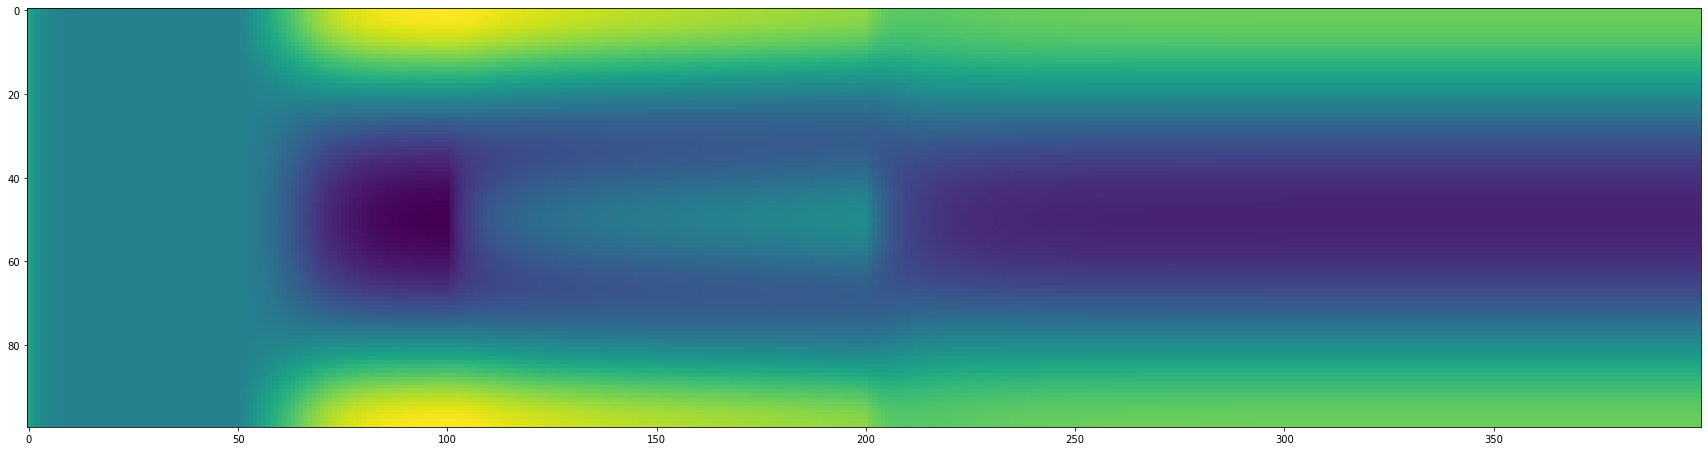

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #import ODEsolver
# Dynamic Neural Field Model (1D)

##General System Parameters
nn = 100;  #The number of neurons in the ring
dx=2*np.pi/nn;  # All nodes are evenly spaced out around the ring
sig = 2*np.pi/10; #standard deviation of weight matrix 
C=0.5; #Inhibition Constant

i=np.array(range(nn)) 
pat=np.zeros((nn,nn))
for loc in range(nn):
    dis= np.fmin(abs(i-loc),nn-abs(i-loc))
    pat[:,loc]=np.exp(-(dis*dx)**2/(2*sig**2))
# integrate from initial conditions
# Training weight matrix
#Hebbian Learning of w
w=pat@pat.T; 
w=w/w[0,0]; 
w=4*(w-C);
  
# continuous-time recurrent neural network 
def udot(u, t, w, I_ext, dx):
    tau_inv=0.2 #timescale constant
    r=1/(1+np.exp(-u)) #logistic activation function
    I_int=w@r*dx;
    dudt = tau_inv*(-u+I_int+I_ext)    
    return dudt


#Controls our Current
def currentSwitch(n_count,act_n,T = bool):
  if T==True:
    I_ext=pat[:,act_n]
    return I_ext
  else:
    I_ext=np.zeros(n_count)
    return I_ext

#Initial Conditions
#t = np.arange(200) #integration time range
u0 = np.zeros(100) #initial conditions 

#Start without external current 
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=False)
I_ext2 = currentSwitch(n_count=nn,act_n=50,T=False)
I_ext=I_ext1 + I_ext2
#First Integration
sol1=odeint(udot, u0, t=np.arange(50), args=(w, I_ext, dx))
u0=sol1[-1,:] #save the first integration


#Second Integration
##Create a stimulus with an input current
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=True)
I_ext2 = currentSwitch(n_count=nn,act_n=50,T=False)
I_ext=I_ext1 + I_ext2
sol2=odeint(udot, u0, t=np.arange(50), args=(w, I_ext, dx)) #I_ext=np.zeros(100) #turn off the Input Current
#append the first integration to this one
sol2=np.append(sol1,sol2,axis=0)
u0=sol2[-1,:]

#Third Integration OVERLAP CONDITION
##Creating the Gap of Stimuli from T=150 TO T=200
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=True)
I_ext2 = 2*currentSwitch(n_count=nn,act_n=50,T=True)
I_ext=I_ext1 + I_ext2
sol3=odeint(udot,u0,t=np.arange(50), args=(w, I_ext, dx))
sol3=np.append(sol2,sol3,axis=0)
u0=sol3[-1,:]

##Fourth Integration 
##Create target stimulus at Node=75 FROM T=200 to T=300
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=True)
I_ext2 = 2*currentSwitch(n_count=nn,act_n=50,T=True)
I_ext=I_ext1 + I_ext2
sol4=odeint(udot,u0,t=np.arange(50), args=(w, I_ext, dx)) #dynamic change of memory around t=64
sol4=np.append(sol3,sol4,axis=0)
u0=sol4[-1,:]

##Fifth Integration
## Take away all stimulus
I_ext1 = currentSwitch(n_count=nn,act_n=0,T=False)
I_ext2 = 2*currentSwitch(n_count=nn,act_n=50,T=False)
I_ext=I_ext1 + I_ext2
sol5=odeint(udot,u0,t=np.arange(200), args=(w, I_ext, dx))
sol5=np.append(sol4,sol5,axis=0)
u0=sol5[-1,:]

##Plot Figure
plt.figure(figsize=(30, 30))
plt.imshow(sol5.T)
